In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

sns.set(style="whitegrid")
pd.set_option("display.max_columns" , None)
warnings.filterwarnings('ignore')

# PROBLEM 4.1    Breakfast Cereals

In [2]:
cereal_df = pd.read_csv('Cereals.csv')

In [3]:
cereal_df.head(20)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.00,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.00,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.00,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.00,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.00,0.75,34.384843
5,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.00,0.75,29.509541
6,Apple_Jacks,K,C,110,2,0,125,1.0,11.0,14.0,30.0,25,2,1.00,1.00,33.174094
7,Basic_4,G,C,130,3,2,210,2.0,18.0,8.0,100.0,25,3,1.33,0.75,37.038562
8,Bran_Chex,R,C,90,2,1,200,4.0,15.0,6.0,125.0,25,1,1.00,0.67,49.120253
9,Bran_Flakes,P,C,90,3,0,210,5.0,13.0,5.0,190.0,25,3,1.00,0.67,53.313813


In [4]:
cereal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     76 non-null     float64
 9   sugars    76 non-null     float64
 10  potass    75 non-null     float64
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(7), int64(6), object(3)
memory usage: 9.8+ KB


In [5]:
cereal_df.astype('object').describe(include='all').loc['unique', :]

name        77
mfr          7
type         2
calories    11
protein      6
fat          5
sodium      27
fiber       13
carbo       21
sugars      16
potass      35
vitamins     3
shelf        3
weight       7
cups        12
rating      77
Name: unique, dtype: object

In [6]:
# shelf and vitamins are ordinal variables , chaning type to category
cereal_df["vitamins"] = cereal_df["vitamins"].astype("category")
cereal_df["shelf"] = cereal_df["shelf"].astype("category")


In [7]:
#Select Quantitative variables
cereal_df.select_dtypes(include=np.number).columns.tolist()

['calories',
 'protein',
 'fat',
 'sodium',
 'fiber',
 'carbo',
 'sugars',
 'potass',
 'weight',
 'cups',
 'rating']

### 4.1 a,
__Which variables are quantitative/numerical? Which are ordinal? Which are nominal?__

__Quantitative columns:__ fiber, carbo, sugars, potass, weight, cups, rating , calories , protein, fat, sodium

__Ordinal:__ _Vitamins_ and _Shelf_

__Nominal:__ _name_ , _mfr_ and _type_

### 4.1 b,  
__Compute the mean, median, min, max, and standard deviation for each of the quantitative
variables. This can be done using pandas as shown in Table 4.3.__

In [8]:
summary_df=cereal_df.describe(percentiles=[.5])
summary_df=summary_df.drop('count')
summary_df= summary_df.rename(index={'50%':'median'})
summary_df.T

,mean,std,min,median,max
calories,106.883117,19.484119,50.000000,110.000000,160.000000
protein,2.545455,1.094790,1.000000,3.000000,6.000000
fat,1.012987,1.006473,0.000000,1.000000,5.000000
sodium,159.675325,83.832295,0.000000,180.000000,320.000000
fiber,2.151948,2.383364,0.000000,2.000000,14.000000
carbo,14.802632,3.907326,5.000000,14.500000,23.000000
sugars,7.026316,4.378656,0.000000,7.000000,15.000000
potass,98.666667,70.410636,15.000000,90.000000,330.000000
weight,1.029610,0.150477,0.500000,1.000000,1.500000
cups,0.821039,0.232716,0.250000,0.750000,1.500000


# 4.1 c, 

__Plot a histogram for each of the quantitative variables. Based on the histograms and summary
statistics, answer the following questions:__


In [9]:
numeric_cols=cereal_df.select_dtypes(include=np.number).columns.tolist()

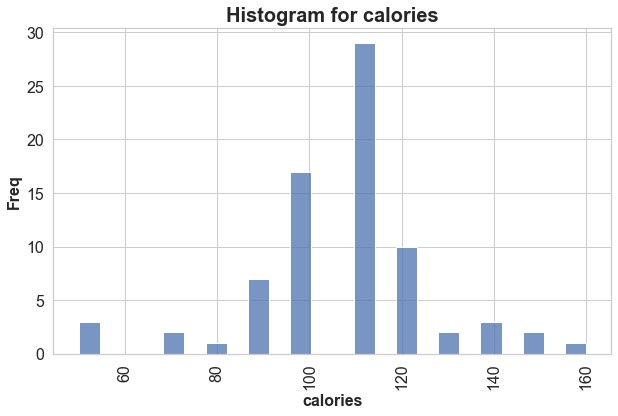

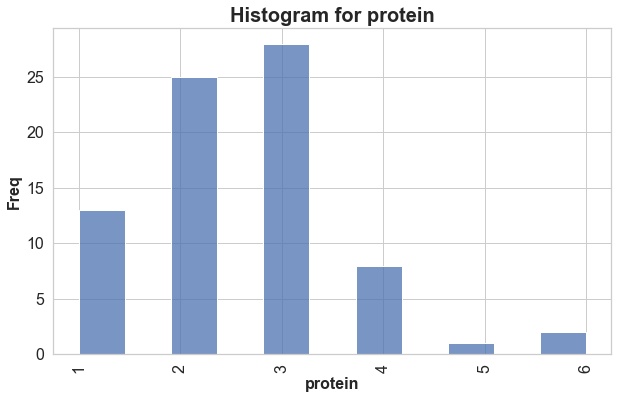

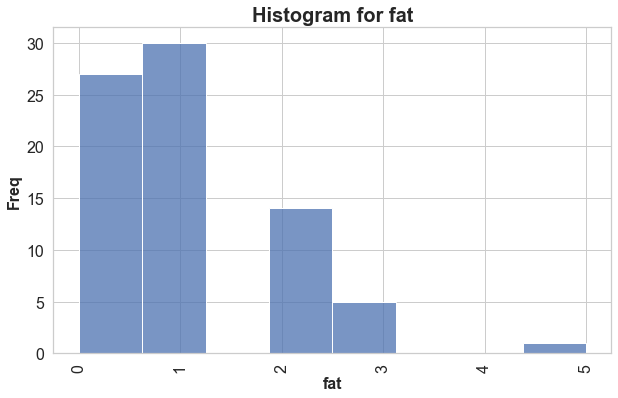

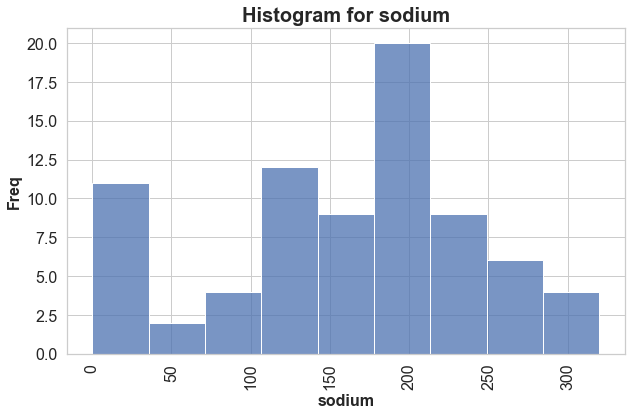

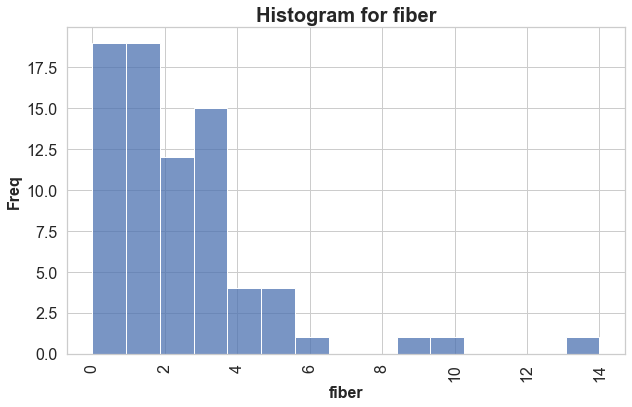

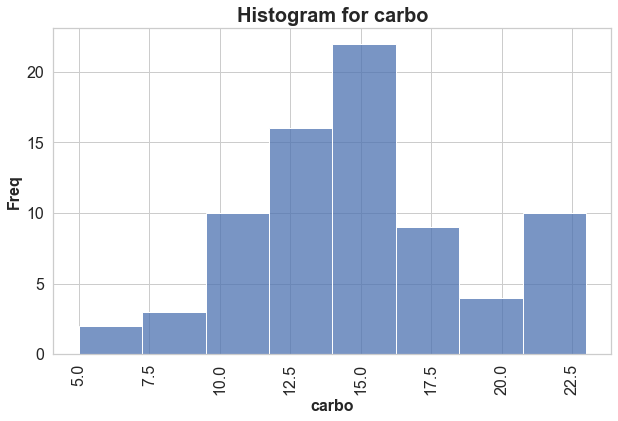

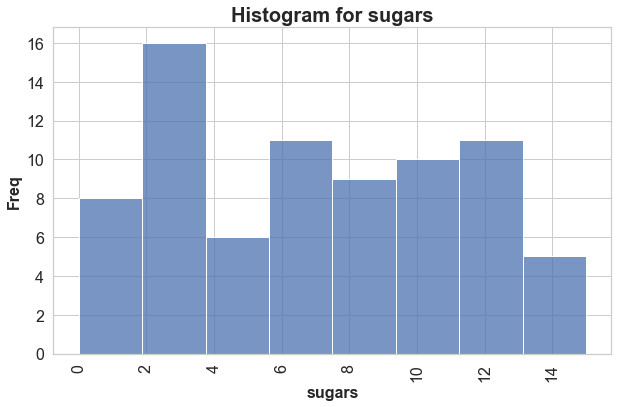

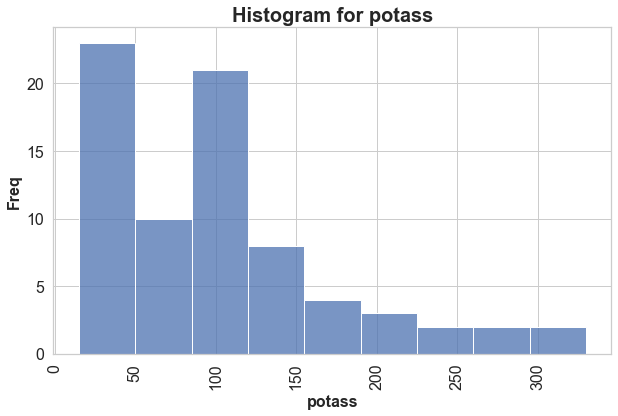

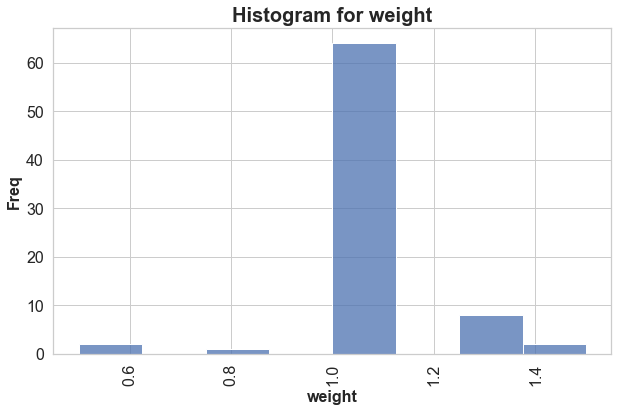

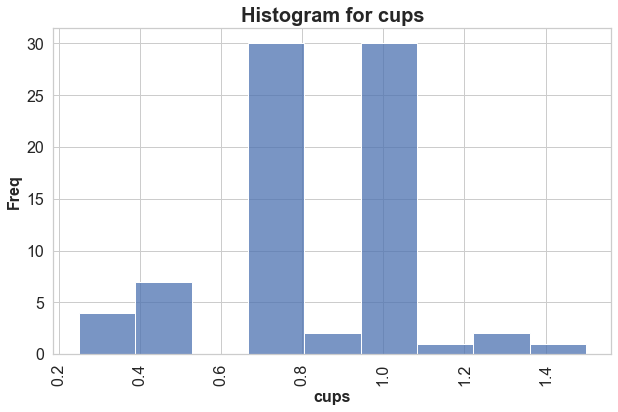

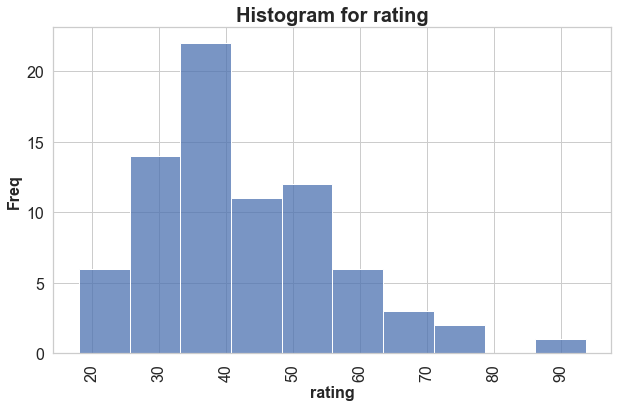

In [10]:
for col in numeric_cols:
    fig, ax = plt.subplots(figsize=(10, 6))
    #sns.displot(cereal_df, x=col, kind='hist'); 
    g = sns.histplot(x=col,  data=cereal_df)
    ax.set_title('Histogram for '+ col , fontsize = 20, loc='center', fontdict=dict(weight='bold'))
    ax.set_xlabel(col, fontsize = 16, fontdict=dict(weight='bold'))
    ax.set_ylabel('Freq', fontsize = 16, fontdict=dict(weight='bold'))
    plt.tick_params(axis='y', which='major', labelsize=16)
    plt.tick_params(axis='x', which='major', labelsize=16)
    ax.tick_params(axis='x', rotation=90)
    plt.show()

__i- Which variables have the largest variability?__

Sugar, carbo and sodium have high variablity.

__ii- Which variables seem skewed?__

Potass , rating and fibre are positively skewed.

Sodium is negatively skewed.


### 4.1 f,
__Compute the correlation table for the quantitative variable (method corr()). In addition,
generate a matrix plot for these variables (see Table 3.4 on how to do this using the seaborn
library)__


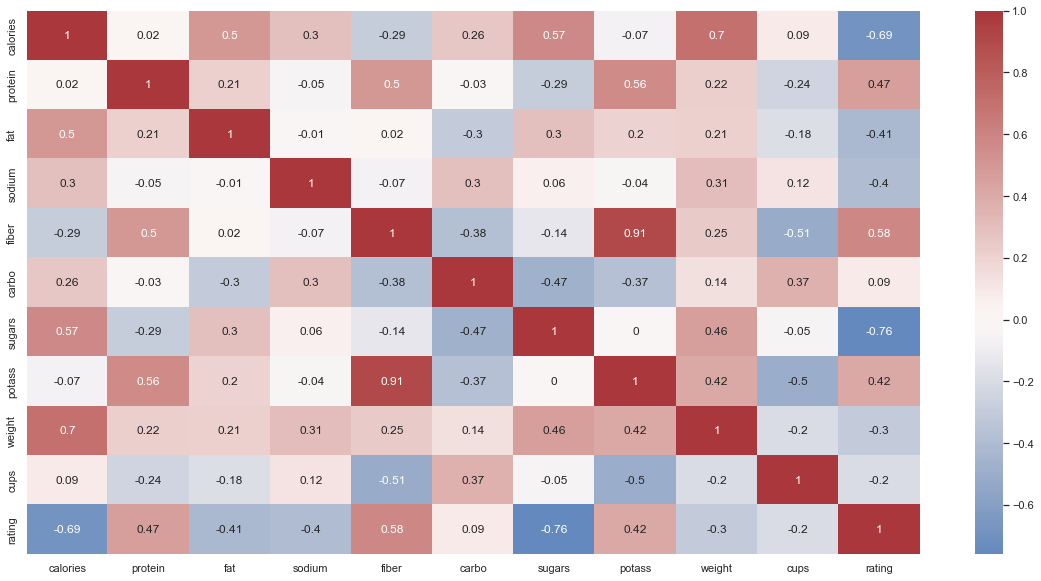

In [11]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(cereal_df[numeric_cols].corr().round(2),center = 0,cmap = 'vlag',annot = True);

__i-Which pair of variables is most strongly correlated?__

fiber and potass are strongly correlated with 0.91 correlation cofficient.


# PROBLEM 4.2   University Rankings. 

In [12]:
university_df = pd.read_csv('Universities.csv')

In [13]:
university_df.head()

,College Name,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,Alaska Pacific University,AK,2,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
1,University of Alaska at Fairbanks,AK,1,1852.0,1427.0,928.0,NaN,NaN,3885.0,4519.0,1742.0,5226.0,1800.0,1790.0,155.0,650.0,2304.0,67.0,10.0,NaN
2,University of Alaska Southeast,AK,1,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0
3,University of Alaska at Anchorage,AK,1,2065.0,1598.0,1162.0,NaN,NaN,6209.0,10537.0,1742.0,5226.0,2600.0,2520.0,114.0,580.0,1260.0,48.0,13.7,NaN
4,Alabama Agri. & Mech. Univ.,AL,1,2817.0,1920.0,984.0,NaN,NaN,3958.0,305.0,1700.0,3400.0,1108.0,1442.0,155.0,500.0,850.0,53.0,14.3,40.0


In [14]:
university_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   College Name              1302 non-null   object 
 1   State                     1302 non-null   object 
 2   Public (1)/ Private (2)   1302 non-null   int64  
 3   # appli. rec'd            1292 non-null   float64
 4   # appl. accepted          1291 non-null   float64
 5   # new stud. enrolled      1297 non-null   float64
 6   % new stud. from top 10%  1067 non-null   float64
 7   % new stud. from top 25%  1100 non-null   float64
 8   # FT undergrad            1299 non-null   float64
 9   # PT undergrad            1270 non-null   float64
 10  in-state tuition          1272 non-null   float64
 11  out-of-state tuition      1282 non-null   float64
 12  room                      981 non-null    float64
 13  board                     804 non-null    float64
 14  add. fee

In [15]:
#Select Quantitative variables
categorical_cols = [col for col in university_df.columns  if col not in university_df.select_dtypes(include=np.float).columns.tolist()]
categorical_cols

['College Name', 'State', 'Public (1)/ Private (2)']

### 4.2 a, 
__Remove all categorical variables. Then remove all records with missing numerical
measurements from the dataset.__

In [16]:
university_df.drop(categorical_cols, axis=1 , inplace=True)

In [17]:
university_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   # appli. rec'd            1292 non-null   float64
 1   # appl. accepted          1291 non-null   float64
 2   # new stud. enrolled      1297 non-null   float64
 3   % new stud. from top 10%  1067 non-null   float64
 4   % new stud. from top 25%  1100 non-null   float64
 5   # FT undergrad            1299 non-null   float64
 6   # PT undergrad            1270 non-null   float64
 7   in-state tuition          1272 non-null   float64
 8   out-of-state tuition      1282 non-null   float64
 9   room                      981 non-null    float64
 10  board                     804 non-null    float64
 11  add. fees                 1028 non-null   float64
 12  estim. book costs         1254 non-null   float64
 13  estim. personal $         1121 non-null   float64
 14  % fac. w

In [18]:
university_df.dropna(how='any',inplace=True)
university_df.shape

(471, 17)

### 4.2 b,
__Conduct a principal components analysis on the cleaned data and comment on the results.
Should the data be normalized? Discuss what characterizes the components you consider key__

In [19]:
pcs = PCA()
pcs.fit(university_df)

pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of variance': pcs.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
Standard deviation,7430.9140,5987.9890,1854.6412,1192.5293,967.4279,679.6527,596.9761,580.6299,417.6136,318.1272,188.8676,155.6062,19.0491,12.5287,11.0184,5.33,2.9059
Proportion of variance,0.5614,0.3645,0.0350,0.0145,0.0095,0.0047,0.0036,0.0034,0.0018,0.0010,0.0004,0.0002,0.0000,0.0000,0.0000,0.00,0.0000
Cumulative proportion,0.5614,0.9259,0.9609,0.9753,0.9848,0.9895,0.9932,0.9966,0.9984,0.9994,0.9997,1.0000,1.0000,1.0000,1.0000,1.00,1.0000


We can see the first component accounts for 56% of the variance, while explains second component about 36%.
So 92% of the variance can be explained by first two componenets. 


In [20]:
#checking first ten principal components
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=pcsSummary_df.columns,
index=university_df.iloc[:, :].columns)
pcsComponents_df.iloc[:,:10]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
# appli. rec'd,0.271883,0.551183,0.664458,0.129476,-0.034246,0.370333,-0.120305,-0.097471,-0.035166,-0.009102
# appl. accepted,0.194107,0.321299,0.190957,-0.008357,-0.076674,-0.813924,0.353520,0.103440,0.075971,-0.040233
# new stud. enrolled,0.084730,0.101590,-0.087451,-0.055253,-0.036068,-0.081429,0.019293,-0.039063,0.030435,0.170403
% new stud. from top 10%,-0.000898,0.001732,0.000136,-0.001906,0.001236,0.009145,-0.003462,-0.002851,-0.001772,0.003426
% new stud. from top 25%,-0.000811,0.001925,0.000040,-0.002352,0.001009,0.007166,-0.003192,-0.002603,-0.000749,0.001050
# FT undergrad,0.458121,0.492263,-0.635303,-0.284582,-0.080402,0.129196,-0.127077,0.011595,-0.021579,-0.012258
# PT undergrad,0.108253,0.073410,-0.285353,0.942562,-0.051743,-0.039789,-0.018146,-0.073893,-0.044043,0.031981
in-state tuition,-0.670187,0.382489,-0.082787,-0.016972,-0.621759,0.000517,-0.060641,0.006407,-0.040511,0.070211
out-of-state tuition,-0.454535,0.428685,-0.129410,0.018657,0.748634,0.010286,0.141481,-0.091839,-0.000236,-0.056493
room,-0.033420,0.055584,0.040113,0.065120,0.115354,-0.050083,-0.314426,0.873995,-0.318999,-0.053459


First PC domninated by  in-state tuition fee. 

Second component dominated by application received, FT undergrad , out of state tuition. 

Third component is also dominated by application received, FT undergrad. 



Since the variables have different scales of measurement, some may result in high variation due to which they are dominating. Therefore,  it makes sense to use Normalized data, so that variables come under the same range.




In [21]:
# WITH NORMALIZED DATA


In [22]:
scaler = StandardScaler()
norm_university_df = pd.DataFrame(scaler.fit_transform(university_df), columns=university_df.columns);
norm_university_df

,# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,-0.726085,-0.766447,-0.793414,-0.650759,-0.573903,-0.710495,0.046333,-0.335086,-0.700046,-0.843743,0.667644,-0.700526,1.541090,0.276102,0.167704,-0.529598,-2.789257
1,-0.737636,-0.778042,-0.756242,-1.300829,-1.558991,-0.658397,0.680985,-1.390805,-1.241943,0.411116,0.226150,-0.970586,-0.299262,-0.220137,-2.054792,-1.145818,-1.465311
2,-0.575673,-0.589724,-0.539768,2.112035,1.593292,-0.468871,-0.382380,0.408890,0.251873,-0.240175,0.544026,-0.728658,-0.912713,-0.604796,0.047569,0.009594,0.355113
3,-0.624090,-0.616912,-0.714697,-0.109035,-0.426140,-0.648535,-0.434836,-0.240728,-0.579315,-1.180618,0.738283,-0.784920,-0.299262,-0.311163,-0.613173,-0.657977,-1.189489
4,0.311318,-0.225084,-0.487290,0.107655,0.214168,-0.569208,-0.439369,-0.678766,-1.139785,-1.118857,-1.027693,0.109652,2.767992,0.129286,-1.033645,0.394732,-1.079161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,0.634509,0.982388,1.286045,-0.434070,-0.179868,1.061916,0.302137,-1.306246,-0.830992,-0.920943,-1.734084,1.943806,-1.654989,-0.076257,0.407974,1.370413,-0.251695
467,-0.736162,-0.773644,-0.771548,-0.596587,-0.721666,-0.703420,-0.502187,-0.055641,-0.342496,-0.591087,-0.391942,-0.813051,-0.299262,0.129286,-1.514185,-1.402576,-0.858503
468,-0.630480,-0.625708,-0.665498,-0.379897,-0.573903,-0.592577,-0.465921,0.192593,-0.024880,-0.908311,-0.557944,-0.807425,0.682259,0.716551,-1.994724,-0.632301,-0.748174
469,0.265113,0.640938,1.340710,-0.759104,0.214168,0.887612,0.998310,-1.405684,-1.272590,-0.268248,-0.250664,-0.137903,0.927639,0.364192,0.227772,0.677166,-0.858503


In [23]:
pcs = PCA()
pcs.fit(norm_university_df)

pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of variance': pcs.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
Standard deviation,2.2773,2.1449,1.0995,1.0336,0.9770,0.8738,0.8041,0.7736,0.7039,0.6629,0.6285,0.5503,0.4388,0.3042,0.2002,0.1745,0.1440
Proportion of variance,0.3044,0.2700,0.0710,0.0627,0.0560,0.0448,0.0380,0.0351,0.0291,0.0258,0.0232,0.0178,0.0113,0.0054,0.0024,0.0018,0.0012
Cumulative proportion,0.3044,0.5745,0.6454,0.7081,0.7642,0.8090,0.8469,0.8821,0.9111,0.9369,0.9601,0.9779,0.9892,0.9946,0.9970,0.9988,1.0000


As seen here, after normalizing, the dominance of first component droped from 56% to 30%, Second component's proportion of variance without scaling was 32%, now it's 27%
About 9 PCs now explain over 90% of data, which was previously explained by two components


In [24]:
#checking first ten principal components
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=pcsSummary_df.columns,
index=university_df.iloc[:, :].columns)
pcsComponents_df.iloc[:,:10]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
# appli. rec'd,0.078361,0.420164,-0.031982,0.072621,-0.016694,0.112320,-0.268145,-0.093570,0.039628,-0.087361
# appl. accepted,0.023659,0.434471,-0.031423,0.118128,-0.089073,0.114381,-0.266285,-0.080991,0.022795,0.035197
# new stud. enrolled,-0.028802,0.445556,-0.038651,-0.031466,-0.075981,0.054079,-0.098870,-0.058138,0.096336,0.019353
% new stud. from top 10%,0.354028,0.093547,-0.120129,-0.372457,0.162260,-0.004445,0.102709,-0.112334,0.028676,-0.326675
% new stud. from top 25%,0.340496,0.118396,-0.142720,-0.385565,0.158187,0.092636,0.136409,-0.039927,-0.006007,-0.314110
# FT undergrad,-0.049586,0.443583,-0.004012,-0.056459,-0.094781,0.043504,-0.043157,-0.043464,0.034858,-0.009057
# PT undergrad,-0.106380,0.287700,0.265769,0.053495,-0.343681,-0.188041,0.509297,-0.122490,0.172351,0.225459
in-state tuition,0.379389,-0.150248,0.084350,0.041064,-0.172639,-0.000539,-0.129328,0.009974,0.092325,0.103905
out-of-state tuition,0.402555,-0.048728,0.051577,0.077658,-0.158499,-0.044407,-0.077965,-0.010688,0.044615,0.151510
room,0.273165,0.052271,0.250578,0.454416,-0.004482,-0.015068,-0.122402,-0.091329,-0.680595,-0.180139


First component now reflects programme fee and % of new students from top 10% and top 25%.

Second Component is dominated by application received, application accepted  , new student enrolled and FT undergrad.

Third component is dominated by Infrastructure (room, board), additional expenses(fee, books cost, personal expense).



# PROBLEM 4.4  Chemical Features of Wine.

In [25]:
wine_df = pd.read_csv('Wine.csv')

In [26]:
wine_df.head()

,Type,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
0,A,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,A,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,A,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,A,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,A,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [27]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Type                  178 non-null    object 
 1   Alcohol               178 non-null    float64
 2   Malic_Acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Ash_Alcalinity        178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total_Phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid_Phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color_Intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280_OD315           178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 19.6+ KB


In [28]:
wine_df.drop(['Type'], axis=1 , inplace= True)


In [29]:
wine_df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### 4.4 a, 
__The data are in the file Wine.csv. Consider the rows labeled “Proportion of Variance.” Explain
why the value for PC1 is so much greater than that of any other column.__

In [30]:
pcs = PCA()
pcs.fit(wine_df)

pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of variance': pcs.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Standard deviation,314.9632,13.1353,3.0722,2.2341,1.1085,0.9171,0.5282,0.3891,0.3348,0.2678,0.1938,0.1452,0.0906
Proportion of variance,0.9981,0.0017,0.0001,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Cumulative proportion,0.9981,0.9998,0.9999,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [31]:
#checking first ten principal components
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=pcsSummary_df.columns,
index=wine_df.iloc[:, :].columns)
pcsComponents_df.iloc[:,:10]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Alcohol,0.001659,0.001203,-0.016874,-0.141447,0.020337,0.194120,-0.923280,-0.284821,-0.086601,-0.002245
Malic_Acid,-0.000681,0.002155,-0.122003,-0.160390,-0.612883,0.742473,0.150110,0.064674,-0.015662,-0.018509
Ash,0.000195,0.004594,-0.051987,0.009773,0.020176,0.041753,-0.045010,0.149340,-0.073650,-0.086800
Ash_Alcalinity,-0.004671,0.026450,-0.938593,0.330965,0.064352,-0.024065,-0.031527,-0.015154,-0.002045,0.003554
Magnesium,0.017868,0.999344,0.029780,0.005394,-0.006149,-0.001924,-0.001797,0.003552,0.001964,-0.000041
Total_Phenols,0.000990,0.000878,0.040485,0.074585,0.315245,0.278717,0.020186,0.177238,-0.255673,0.847195
Flavanoids,0.001567,-0.000052,0.085443,0.169087,0.524761,0.433598,0.038869,0.248117,-0.378307,-0.520138
Nonflavanoid_Phenols,-0.000123,-0.001354,-0.013511,-0.010806,-0.029648,-0.021953,0.004665,-0.006498,-0.036752,0.037713
Proanthocyanins,0.000601,0.005004,0.024659,0.050121,0.251183,0.241884,0.309799,-0.870433,0.051520,0.009723
Color_Intensity,0.002327,0.015100,-0.291398,-0.878894,0.331747,0.002740,0.112837,0.081287,0.099029,-0.023147


First PC explains 99.8% of variance, and this is dominated by Proline (99%). From the dataset, every other feature is in scale of units and tens, while Proline has scale in thousands.  So the variance of Proline is very high

### 4.4 b,
__Comment on the use of normalization (standardization) in part (a).__


PCA works by maximizing the variance. When variables such as Proline, has difference of scale, and have higher variance in terms of scale then any other variable, PCA tends to project in the direction of that maximum variance. It is necessary to normalize the data to same scale (unit variance), so when is applied to those set of features, we may find other features which can have better explainability.  